In [1]:
%matplotlib inline
import importlib, mozpy, logging, sys
import matplotlib.pyplot as plt

In [2]:
importlib.reload(mozpy)
logging.basicConfig(stream = sys.stderr, level = logging.INFO)

In [3]:
%cat ./springmassdamper.moz

include GRAPHSIMCLI

def x1, x2, y, F, t: <Real>
def k, d, m: <Real>

def model = {
  param k 10.;
  param d 2.;
  param m 3.;

  // F = -m * GRAVITATIONAL_CONSTANT;
  F = sin(t);
  t' = 1.;

  x1' = x2;
  x2' = (-k / m) * x1 + (-d / m) * x2 + (F / m);
  y = x1;

  x1 <- 1.;
  y <- 1.;
  x2 <~ 0.;

  probe t;
  probe F;
  probe y
}

def main = (export2ModelicaCLI model)


In [4]:
model = mozpy.Model("./springmassdamper.moz", "python ../../docker_moz.py")
# model = mozpy.Model("./springmassdamper.moz")

In [5]:
model.elaborate().set_parameters(d_1 = 2.5, k_1 = 14).simulate(t0 = 0, tf = 20, h = 0.1)

2019-10-16 12:08:53,880 - OMPython - INFO - OMC Server is up and running at file:////tmp/openmodelica.oerikss.port.1dd33a857ea9499496431217d31bc717 pid=27256
INFO:OMPython:OMC Server is up and running at file:////tmp/openmodelica.oerikss.port.1dd33a857ea9499496431217d31bc717 pid=27256


In [6]:
model.get_parameters()

{'d_1': 2.5, 'k_1': 14.0, 'm_1': 3.0}

In [7]:
model.get_solved_variables()

('F_1', 'd_1', 'der(t_1)', 'k_1', 'm_1', 't_1', 'time', 'x1_1', 'y_1')

In [8]:
tt = model.get_solutions("t_1")

In [9]:
yy = model.get_solutions("y_1")

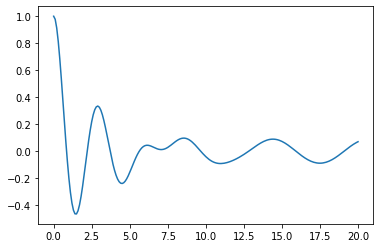

In [10]:
plt.plot(tt, yy)

In [11]:
model.get_solutions(["t_1", "y_1"])

array([[ 0.00000000e+00,  1.00000000e-01,  2.00000000e-01,
         3.00000000e-01,  4.00000000e-01,  5.00000000e-01,
         6.00000000e-01,  7.00000000e-01,  8.00000000e-01,
         9.00000000e-01,  1.00000000e+00,  1.10000000e+00,
         1.20000000e+00,  1.30000000e+00,  1.40000000e+00,
         1.50000000e+00,  1.60000000e+00,  1.70000000e+00,
         1.80000000e+00,  1.90000000e+00,  2.00000000e+00,
         2.10000000e+00,  2.20000000e+00,  2.30000000e+00,
         2.40000000e+00,  2.50000000e+00,  2.60000000e+00,
         2.70000000e+00,  2.80000000e+00,  2.90000000e+00,
         3.00000000e+00,  3.10000000e+00,  3.20000000e+00,
         3.30000000e+00,  3.40000000e+00,  3.50000000e+00,
         3.60000000e+00,  3.70000000e+00,  3.80000000e+00,
         3.90000000e+00,  4.00000000e+00,  4.10000000e+00,
         4.20000000e+00,  4.30000000e+00,  4.40000000e+00,
         4.50000000e+00,  4.60000000e+00,  4.70000000e+00,
         4.80000000e+00,  4.90000000e+00,  5.00000000e+0

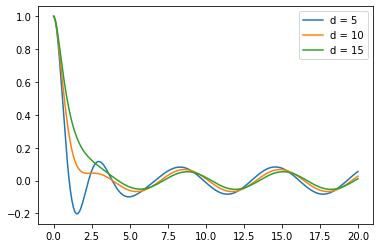

In [12]:
for d in [5, 10, 15]:
    model.set_parameters(d_1 = d)
    model.simulate(h = 0.1)
    yy = model.get_solutions("y_1")
    plt.plot(tt, yy, label = "d = " + str(d))
plt.legend()
plt.show()